In [1]:
%matplotlib inline
from IPython.display import display, HTML
from analysis import Analysis
from models import *
analysis = Analysis('weather', title='02-Chunk2', logger=display)
analysis.load_data()

D:\Users\fjd10\Anaconda3\envs\tensorflow\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


Now setting the features and predictor to just be the avg temperature value.

In [2]:
predictor = 'actual_mean_temp'
features = [predictor]
analysis.set_feature_predictor_columns(features, predictor)
analysis.train_test_split()

'Number of train data points: 292'

'Number of test data points: 73'

Set some parameters that are used by some of the models

In [3]:
# The number of days to chunk inputs by
NUM_DAYS = 2

# 
NUM_FEATURES = len(analysis.features)

Going to try each different model.

# Raw Data

Raw Data means that the model simply takes the data as a sequence and no data manipulation is performed.

## ARIMA

Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=1827.791, BIC=1846.175, Fit time=1.732 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 0, 12); AIC=1962.638, BIC=1977.345, Fit time=0.464 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=1864.170, BIC=1878.877, Fit time=1.044 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 1, 12); AIC=1829.085, BIC=1851.146, Fit time=2.041 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 0, 12); AIC=1986.101, BIC=2000.808, Fit time=0.610 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 2, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 2, 12); AIC=1831.230, BIC=1856.967, Fit time=5.896 seconds
Fit ARIMA: order=(2, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=1811.604, BIC=1833.664, Fit time=2.209 seconds
Fit ARIMA: order=(2, 1, 0) seasonal_order=(0, 1, 1, 

'Train Error: 5.07417608657  Num NaN: 0'

'Test Error: 6.38998095112    Num NaN: 0'

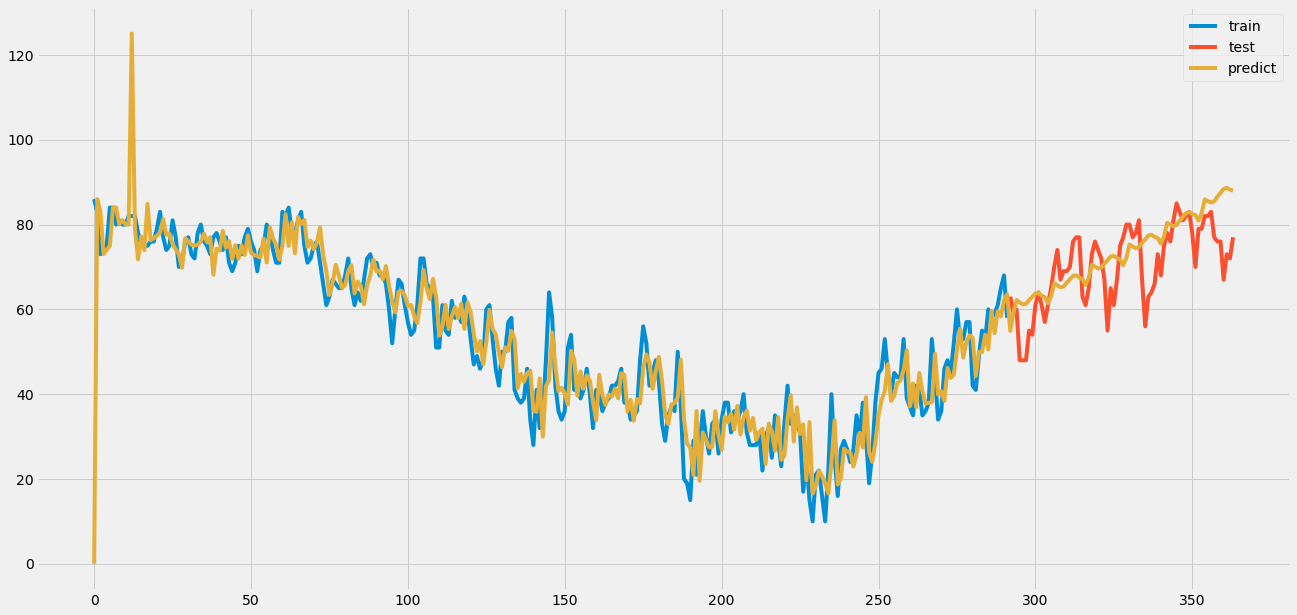

In [4]:
model = ARIMA(analysis, use_features=False)
analysis.run_model(model, name='ARIMA')

'Train Error: 4.50479452055  Num NaN: 0'

'Test Error: 4.60555555556    Num NaN: 0'

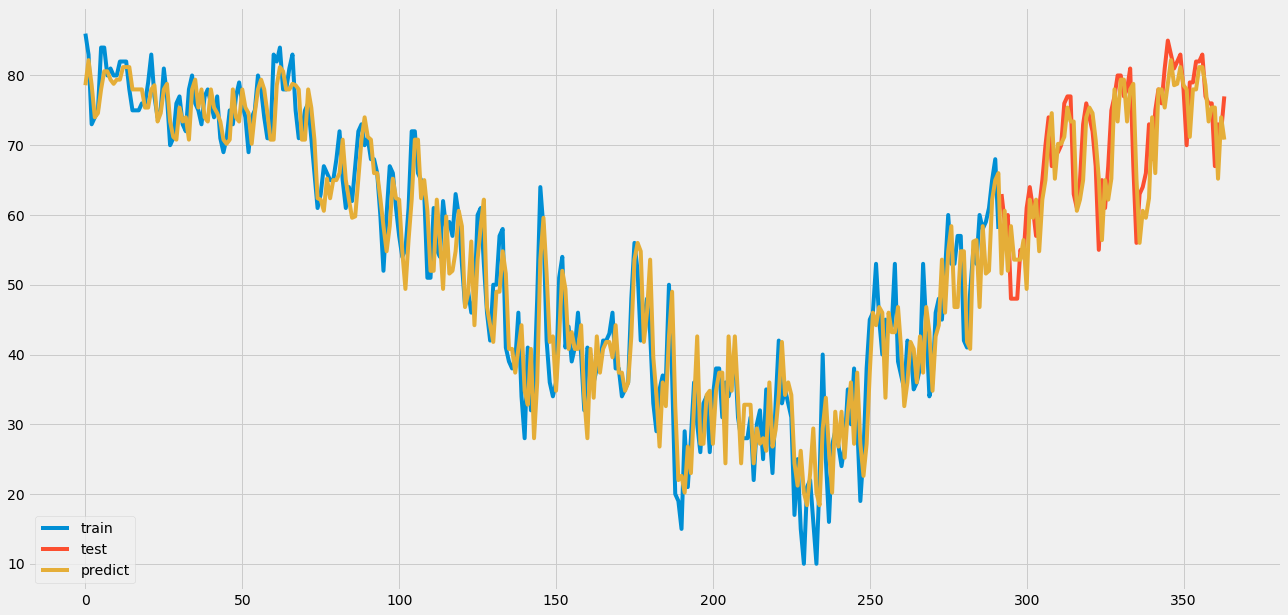

In [5]:
from sklearn.neighbors import KNeighborsRegressor
model = Regressor(analysis, KNeighborsRegressor)
analysis.run_model(model, name='KNN')

D:\Users\fjd10\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


'Train Error: 5.58469014091e+12  Num NaN: 0'

'Test Error: 7.45213414657e+12    Num NaN: 0'

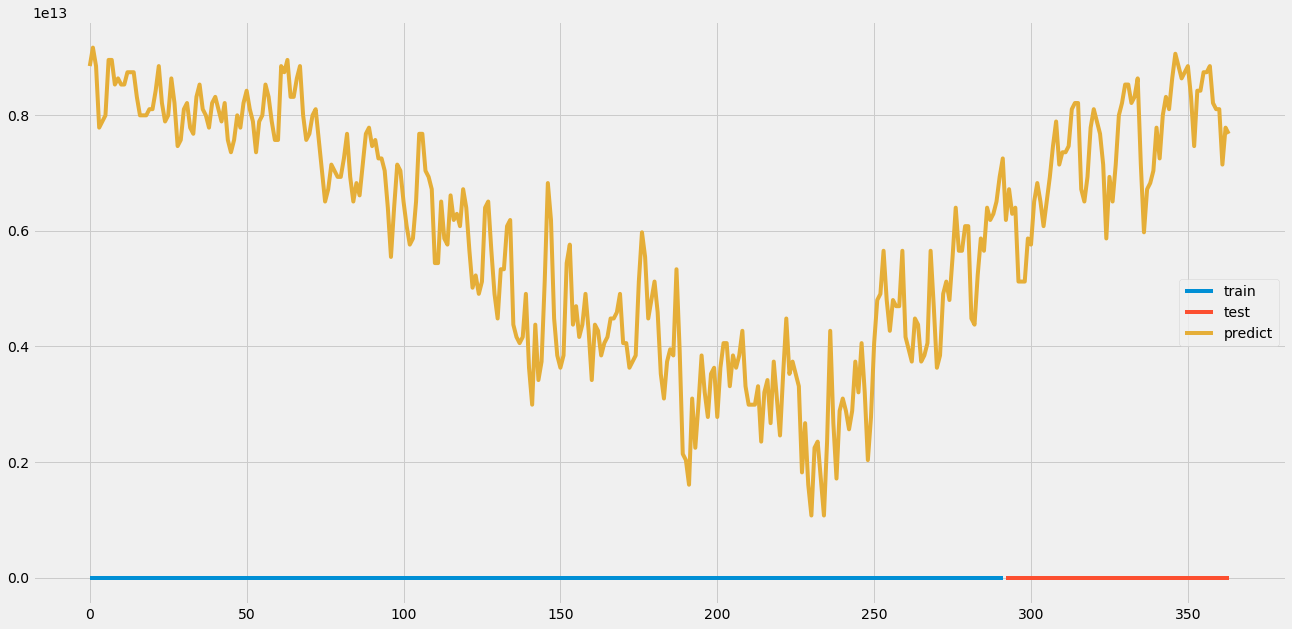

In [6]:
from sklearn.linear_model import SGDRegressor
model = Regressor(analysis, SGDRegressor)
analysis.run_model(model, name='SGD')

'Train Error: 4.36372958947  Num NaN: 0'

'Test Error: 4.47644125165    Num NaN: 0'

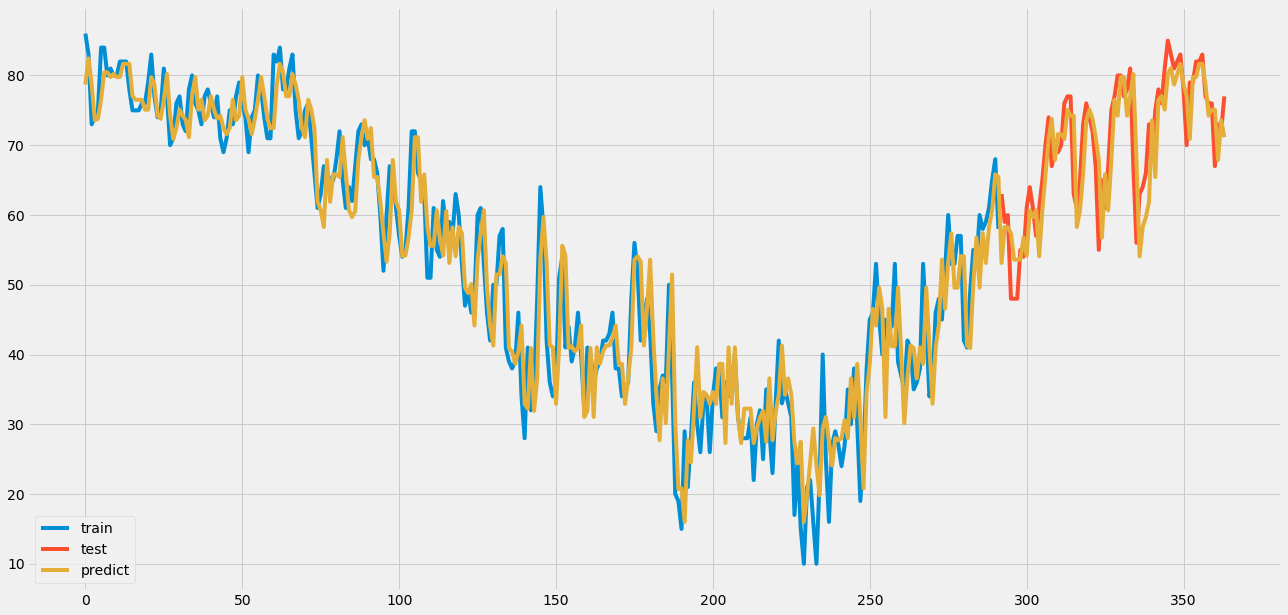

In [7]:
from sklearn.ensemble import RandomForestRegressor
model = Regressor(analysis, RandomForestRegressor)
analysis.run_model(model, name='RandomForest')

'Train Error: 4.62209103513  Num NaN: 0'

'Test Error: 4.60100455584    Num NaN: 0'

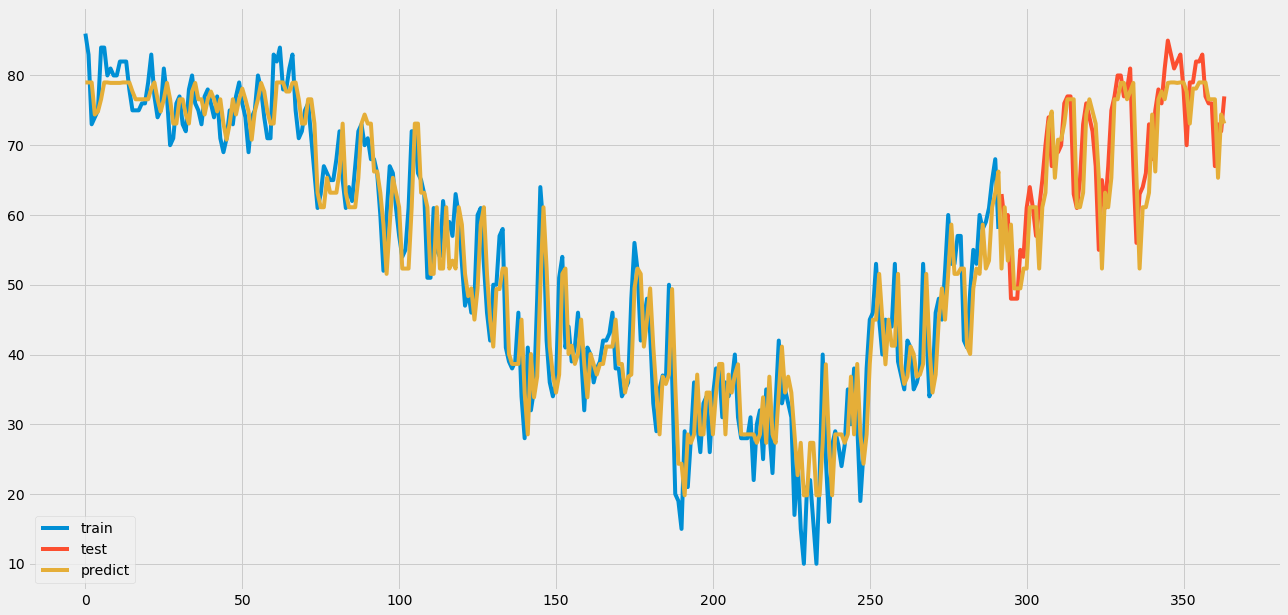

In [8]:
from sklearn.ensemble import AdaBoostRegressor
model = Regressor(analysis, AdaBoostRegressor)
analysis.run_model(model, name='AdaBoost')

'Train Error: 4.26186738031  Num NaN: 0'

'Test Error: 4.49174492061    Num NaN: 0'

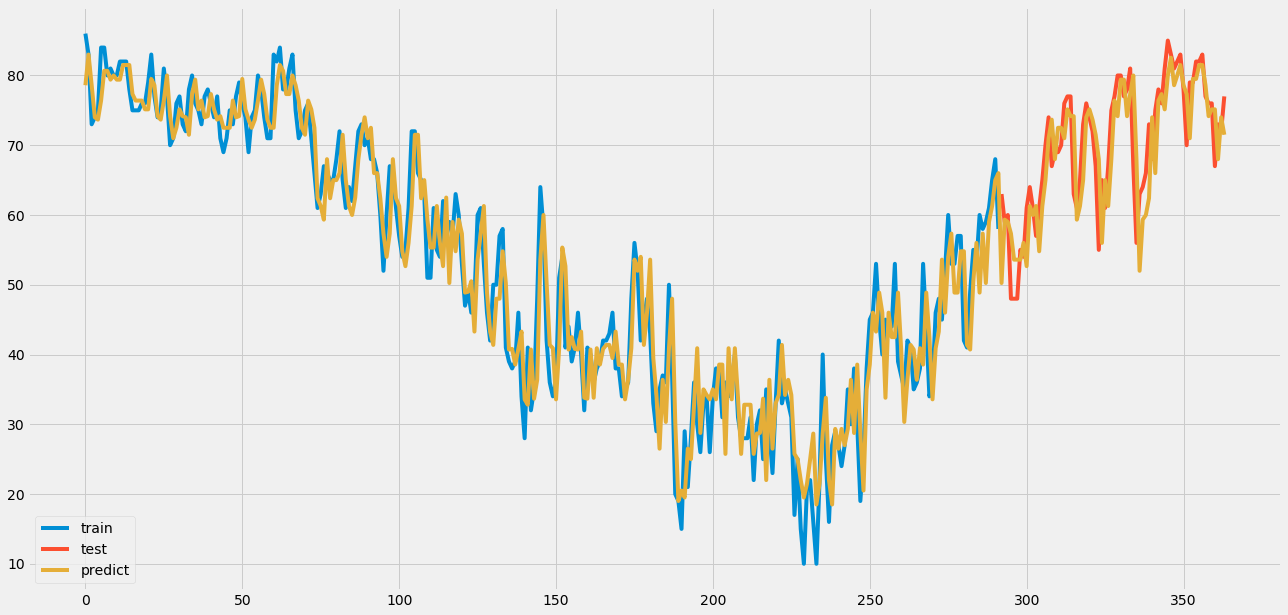

In [9]:
from sklearn.gaussian_process import GaussianProcessRegressor
model = Regressor(analysis, GaussianProcessRegressor)
analysis.run_model(model, name='GaussianProcess')

# Chunking Data

Now going to use models that require chunking.  We perform chunking by taking the time series:

x = (x0, x1, x2, x3, ...)
y = (x1, x2, x3, x4, ...)

and modifying it such that if the chunk parameter, c, is set to 3:

x = ((x0, x1, x2), (x1, x2, x3), (x2, x3, x4), ...)
y = (x3, x4, x5, ...)

This results in the first c values in not having a prediction and thus (Num NaN is > 0 and == c).



## LinearRegression

'Train Error: 6.30737821625  Num NaN: 2'

'Test Error: 6.42161308615    Num NaN: 2'

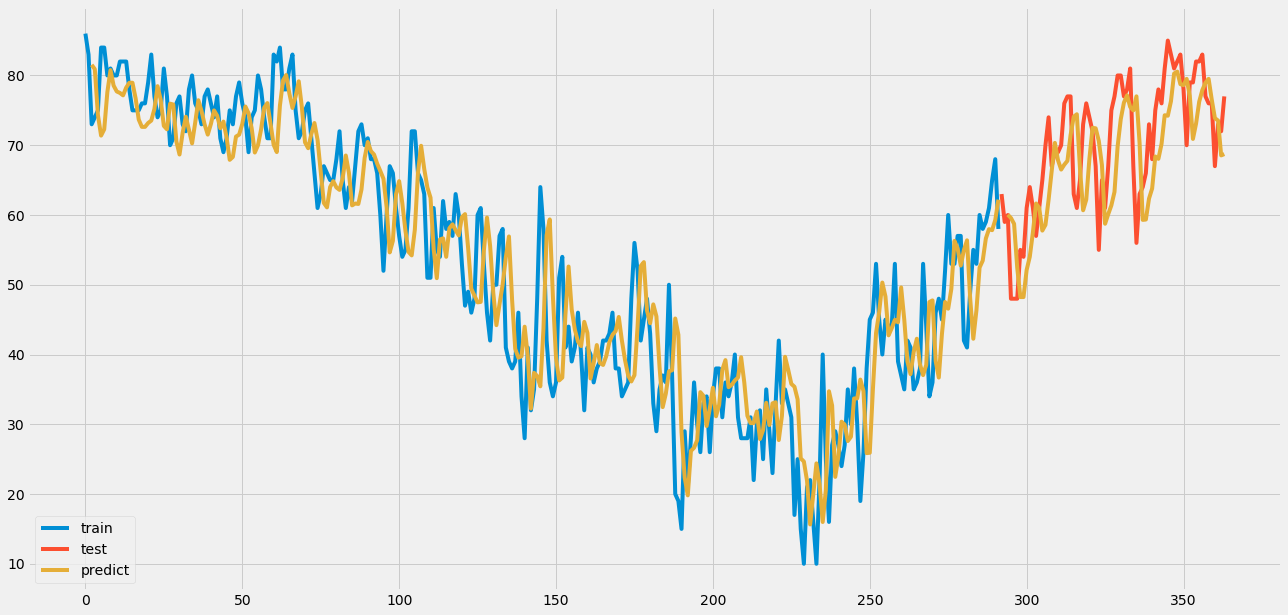

In [10]:
model = LinearRegression(analysis, num_days=NUM_DAYS)
analysis.run_model(model, name='LinearRegression')

## FeedForward Neural Network

Using TensorFlow backend.


Train on 290 samples, validate on 70 samples
Epoch 1/10
 - 1s - loss: 0.3145 - val_loss: 0.2844
Epoch 2/10
 - 0s - loss: 0.1886 - val_loss: 0.1770
Epoch 3/10
 - 0s - loss: 0.1760 - val_loss: 0.1141
Epoch 4/10
 - 0s - loss: 0.1776 - val_loss: 0.1874
Epoch 5/10
 - 0s - loss: 0.1754 - val_loss: 0.2331
Epoch 6/10
 - 0s - loss: 0.1822 - val_loss: 0.1899
Epoch 7/10
 - 0s - loss: 0.1700 - val_loss: 0.2070
Epoch 8/10
 - 0s - loss: 0.1663 - val_loss: 0.1306
Epoch 9/10
 - 0s - loss: 0.1724 - val_loss: 0.2451
Epoch 10/10
 - 0s - loss: 0.1758 - val_loss: 0.1582


'Train Error: 11.4999454992  Num NaN: 2'

'Test Error: 11.8627761296    Num NaN: 2'

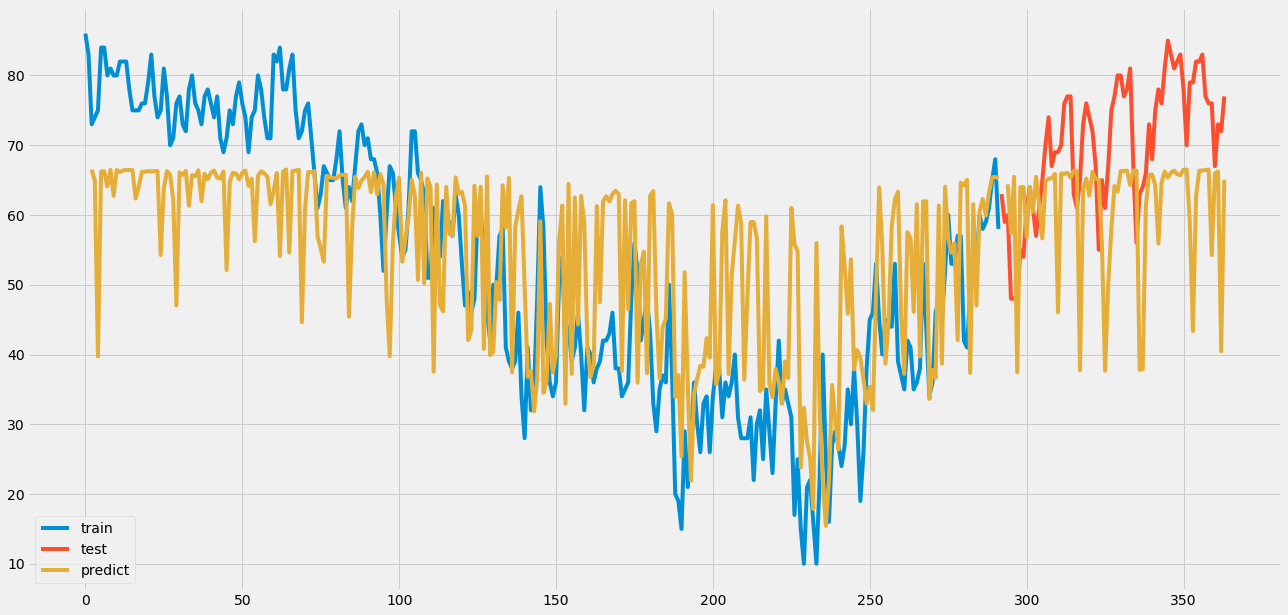

In [11]:
from keras.models import Sequential
from keras import optimizers
from keras import layers

nn = Sequential()
nn.add(layers.Dense(25, activation='tanh',
                    batch_input_shape=(None, NUM_DAYS * NUM_FEATURES)))
nn.add(layers.Dense(10, activation='tanh'))
nn.add(layers.Dense(1, activation='tanh'))
nn.compile(loss='mae', optimizer='sgd')

model = FNN(analysis, nn, num_days=NUM_DAYS)
analysis.run_model(model, name='FNN')


## Recurrent Neural Network with Single Output

Single output means that the chunked timesteps are input and then the final output of the RNN is used as the prediction.

Train on 290 samples, validate on 70 samples
Epoch 1/10
 - 1s - loss: 0.3622 - val_loss: 0.3819
Epoch 2/10
 - 0s - loss: 0.2311 - val_loss: 0.4027
Epoch 3/10
 - 0s - loss: 0.2420 - val_loss: 0.2275
Epoch 4/10
 - 0s - loss: 0.2382 - val_loss: 0.3532
Epoch 5/10
 - 0s - loss: 0.2452 - val_loss: 0.1115
Epoch 6/10
 - 0s - loss: 0.2339 - val_loss: 0.2595
Epoch 7/10
 - 0s - loss: 0.2380 - val_loss: 0.1053
Epoch 8/10
 - 0s - loss: 0.2463 - val_loss: 0.3641
Epoch 9/10
 - 0s - loss: 0.2499 - val_loss: 0.3449
Epoch 10/10
 - 0s - loss: 0.2412 - val_loss: 0.4725


'Train Error: 20.3979740537  Num NaN: 2'

'Test Error: 35.4366891044    Num NaN: 2'

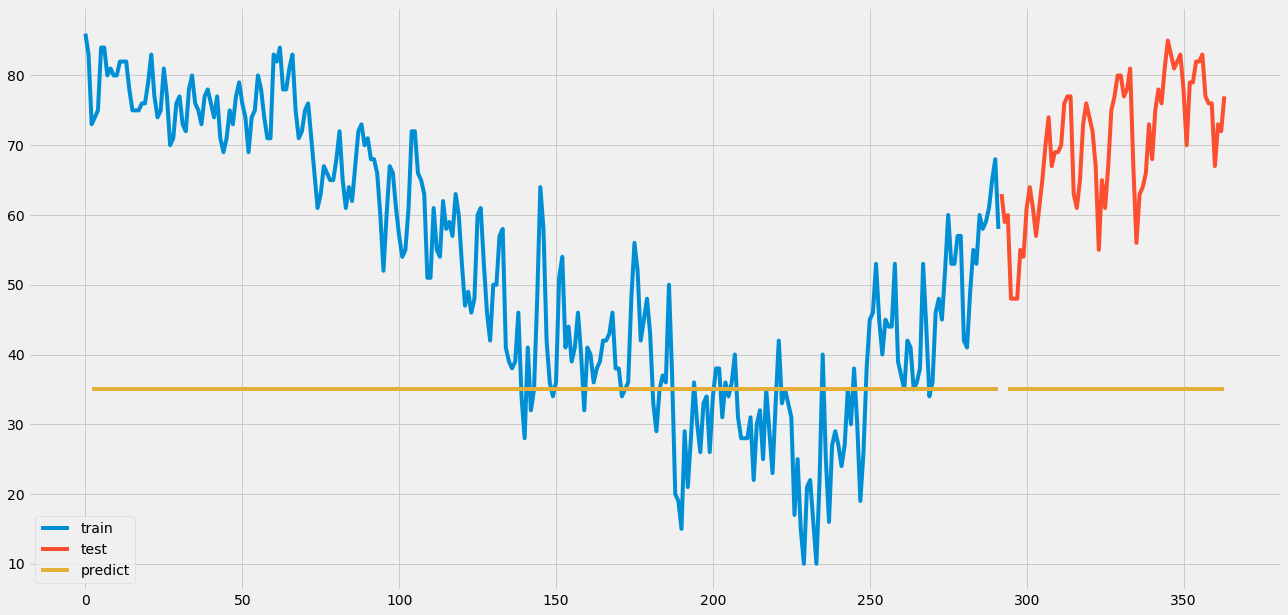

In [12]:
from keras.models import Sequential
from keras import optimizers
from keras import layers

mask_value = -9999

nn = Sequential()
nn.add(layers.Masking(mask_value=mask_value, input_shape=(NUM_DAYS, NUM_FEATURES)))
nn.add(layers.SimpleRNN(50, input_shape=(NUM_DAYS, NUM_FEATURES)))

nn.add(layers.Dense(1, activation='tanh'))
nn.add(layers.Dense(1, activation='linear'))
nn.compile(loss='mae', optimizer=optimizers.RMSprop(lr=0.1))
        
model = RNNSingle(analysis, nn, num_days=NUM_DAYS, mask_value=mask_value)
analysis.run_model(model, name='RNNSingle')

## Recurrent Neural Network with Multiple Outputs

Multiple outputs means that the chunked data is input and the output at each timestep is used.

Train on 147 samples, validate on 37 samples
Epoch 1/10
 - 1s - loss: 0.6717 - val_loss: 0.4020
Epoch 2/10
 - 0s - loss: 0.2238 - val_loss: 0.1411
Epoch 3/10
 - 0s - loss: 0.0772 - val_loss: 0.0419
Epoch 4/10
 - 0s - loss: 0.0233 - val_loss: 0.0122
Epoch 5/10
 - 0s - loss: 0.0091 - val_loss: 0.0049
Epoch 6/10
 - 0s - loss: 0.0045 - val_loss: 0.0022
Epoch 7/10
 - 0s - loss: 0.0024 - val_loss: 0.0013
Epoch 8/10
 - 0s - loss: 0.0021 - val_loss: 0.0011
Epoch 9/10
 - 0s - loss: 0.0019 - val_loss: 8.2624e-04
Epoch 10/10
 - 0s - loss: 0.0015 - val_loss: 8.7836e-04


'Train Error: 12.4584671504  Num NaN: 0'

'Test Error: 8.83264748255    Num NaN: 0'

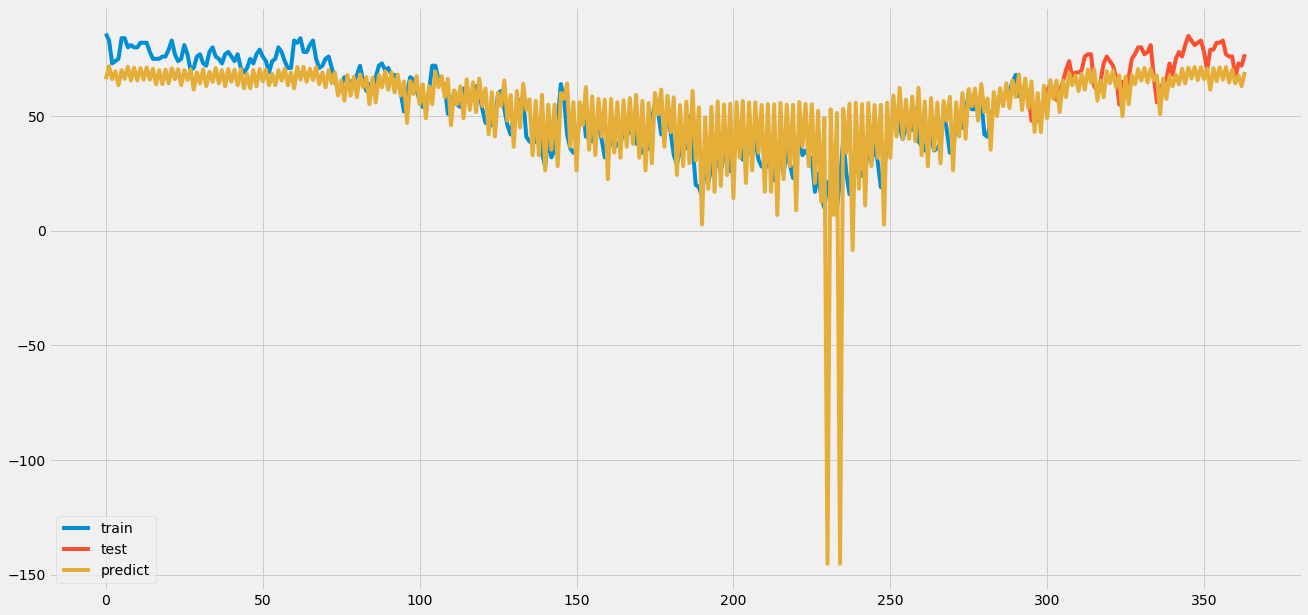

In [13]:
from keras.models import Sequential
from keras import optimizers
from keras import layers

mask_value = -9999

nn = Sequential()
nn.add(layers.Masking(mask_value=mask_value, input_shape=(NUM_DAYS, NUM_FEATURES)))
nn.add(layers.LSTM(50, activation='tanh', input_shape=(NUM_DAYS, NUM_FEATURES), return_sequences=True))

nn.add(layers.TimeDistributed(layers.Dense(10, activation='relu')))
nn.add(layers.TimeDistributed(layers.Dense(1, activation='tanh')))
# nn.add(layers.TimeDistributed(layers.Dense(1, activation='linear')))
nn.compile(loss='mae', optimizer='rmsprop')

model = RNNMultiple(analysis, nn, num_days=NUM_DAYS, mask_value=mask_value)
analysis.run_model(model, name='RNNMultiple')

## Recurrent Neural Network Complete Sequence

Complete sequence means that the entire sequence is input into the network and each timestep produces an output.  There are no batches, just one long sequence.

D:\Users\fjd10\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


Train on 1 samples, validate on 1 samples
Epoch 1/10
 - 2s - loss: 0.4405 - val_loss: 0.2597
Epoch 2/10
 - 1s - loss: 0.2641 - val_loss: 0.1510
Epoch 3/10
 - 1s - loss: 0.1869 - val_loss: 0.1093
Epoch 4/10
 - 1s - loss: 0.1346 - val_loss: 0.0860
Epoch 5/10
 - 1s - loss: 0.0825 - val_loss: 0.0734
Epoch 6/10
 - 1s - loss: 0.0647 - val_loss: 0.0648
Epoch 7/10
 - 1s - loss: 0.0556 - val_loss: 0.0579
Epoch 8/10
 - 1s - loss: 0.0488 - val_loss: 0.0523
Epoch 9/10
 - 1s - loss: 0.0434 - val_loss: 0.0477
Epoch 10/10
 - 1s - loss: 0.0389 - val_loss: 0.0436


'Train Error: 352.773379757  Num NaN: 0'

'Test Error: 440.206665463    Num NaN: 0'

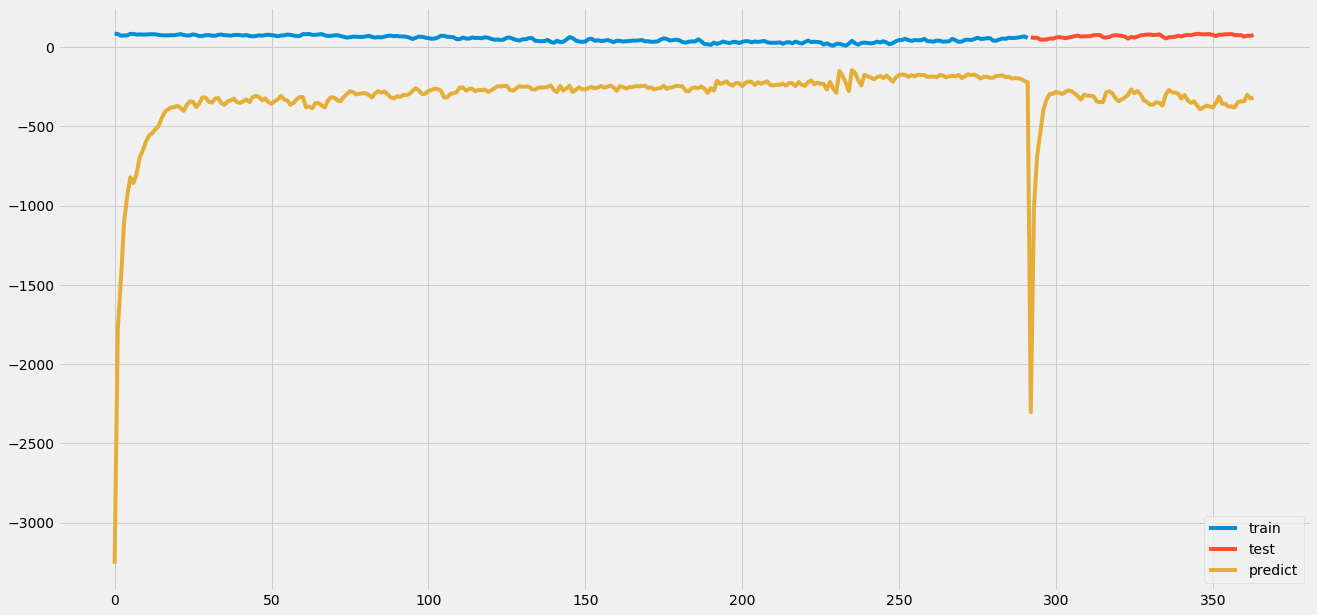

In [14]:
from keras.models import Sequential
from keras import optimizers
from keras import layers

mask_value = -9999

nn = Sequential()
nn.add(layers.Masking(mask_value=mask_value, input_shape=(len(analysis.x_train), NUM_FEATURES)))
nn.add(layers.LSTM(50, activation='tanh', input_shape=(len(analysis.x_train), NUM_FEATURES), return_sequences=True))

nn.add(layers.TimeDistributed(layers.Dense(10, activation='relu')))
nn.add(layers.TimeDistributed(layers.Dense(1, activation='tanh')))
# nn.add(layers.TimeDistributed(layers.Dense(1, activation='linear')))
nn.compile(loss='mae', optimizer='rmsprop')

model = RNNAll(analysis, nn, mask_value=mask_value)
analysis.run_model(model, name='RNNAll')